In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer=load_breast_cancer()

In [36]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
#print(cancer['DESCR'])

In [38]:
df_features=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_features.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
261,17.35,23.06,111.0,933.1,0.08662,0.0629,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.2,1218.0,0.124,0.1486,0.1211,0.08235,0.2452,0.06515


In [39]:
df_target=pd.DataFrame(cancer['target'],columns=['output'])

In [40]:
df=df_target.join(df_features)
df.sample(5)

,output,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
565,0,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,23.690,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637
533,0,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.101500,0.2166,...,23.230,27.15,152.00,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386
114,1,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.019240,0.1649,...,9.628,19.62,64.48,284.4,0.1724,0.2364,0.2456,0.10500,0.2926,0.10170
373,0,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.089410,0.1571,...,25.370,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055
59,1,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,...,9.507,15.40,59.90,274.9,0.1733,0.1239,0.1168,0.04419,0.3220,0.09026


<Axes: >

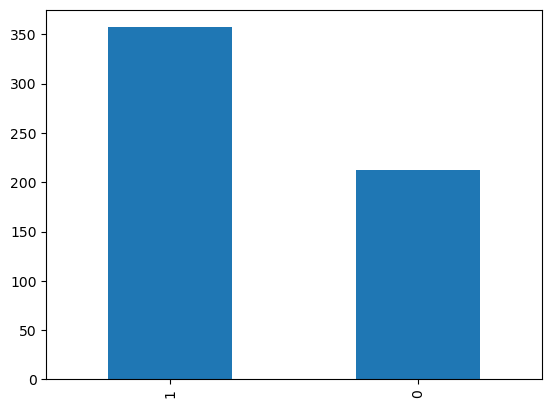

In [41]:
df['output'].value_counts().plot(kind='bar')

<Axes: >

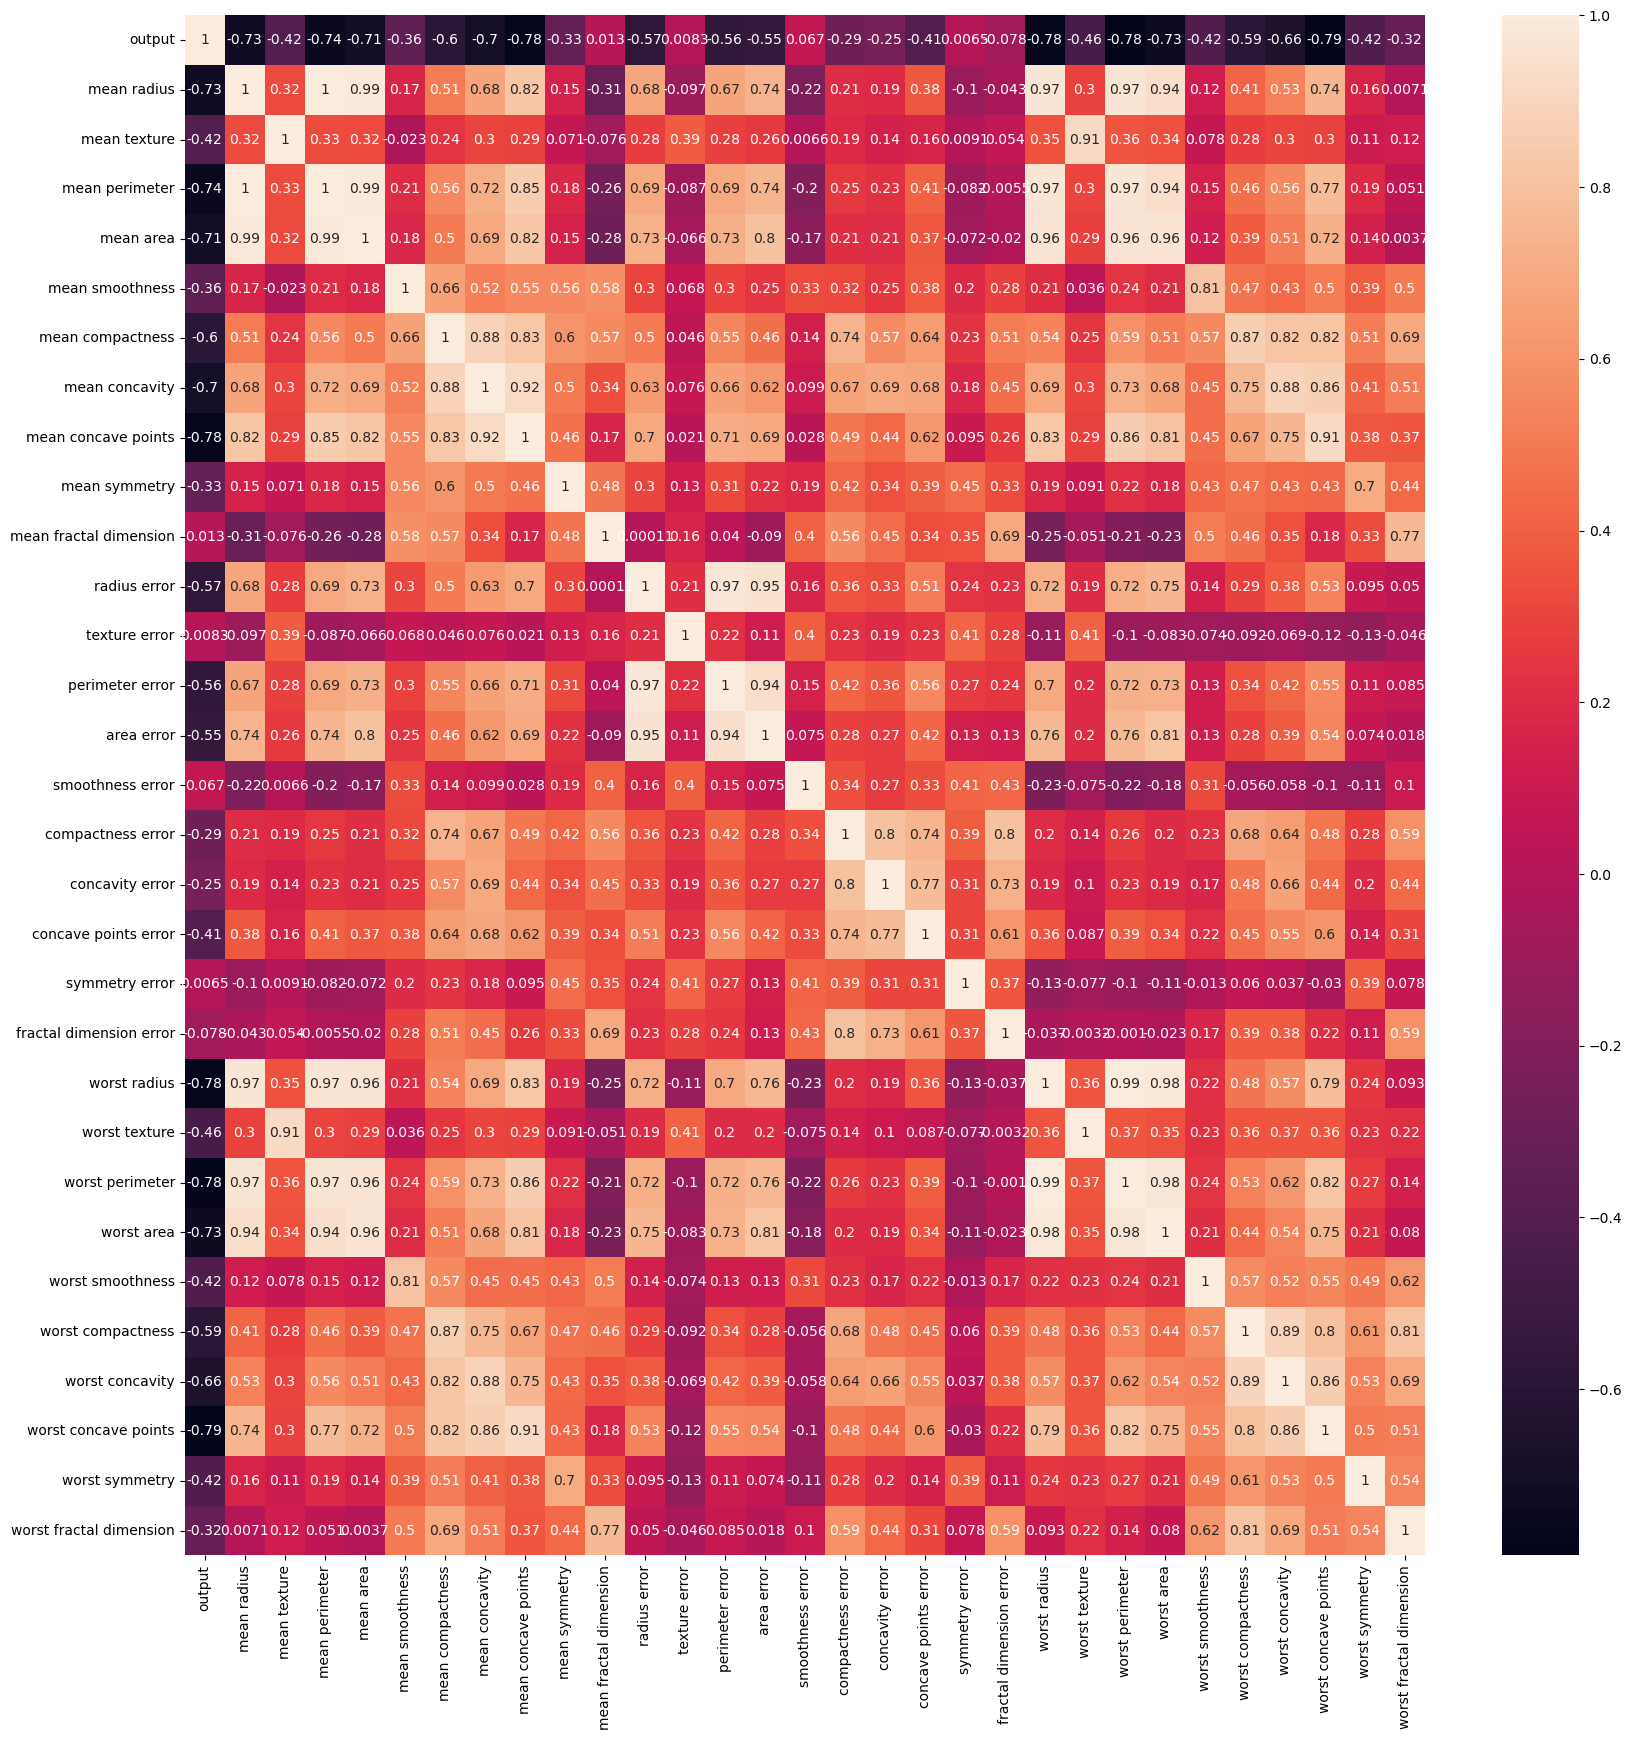

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

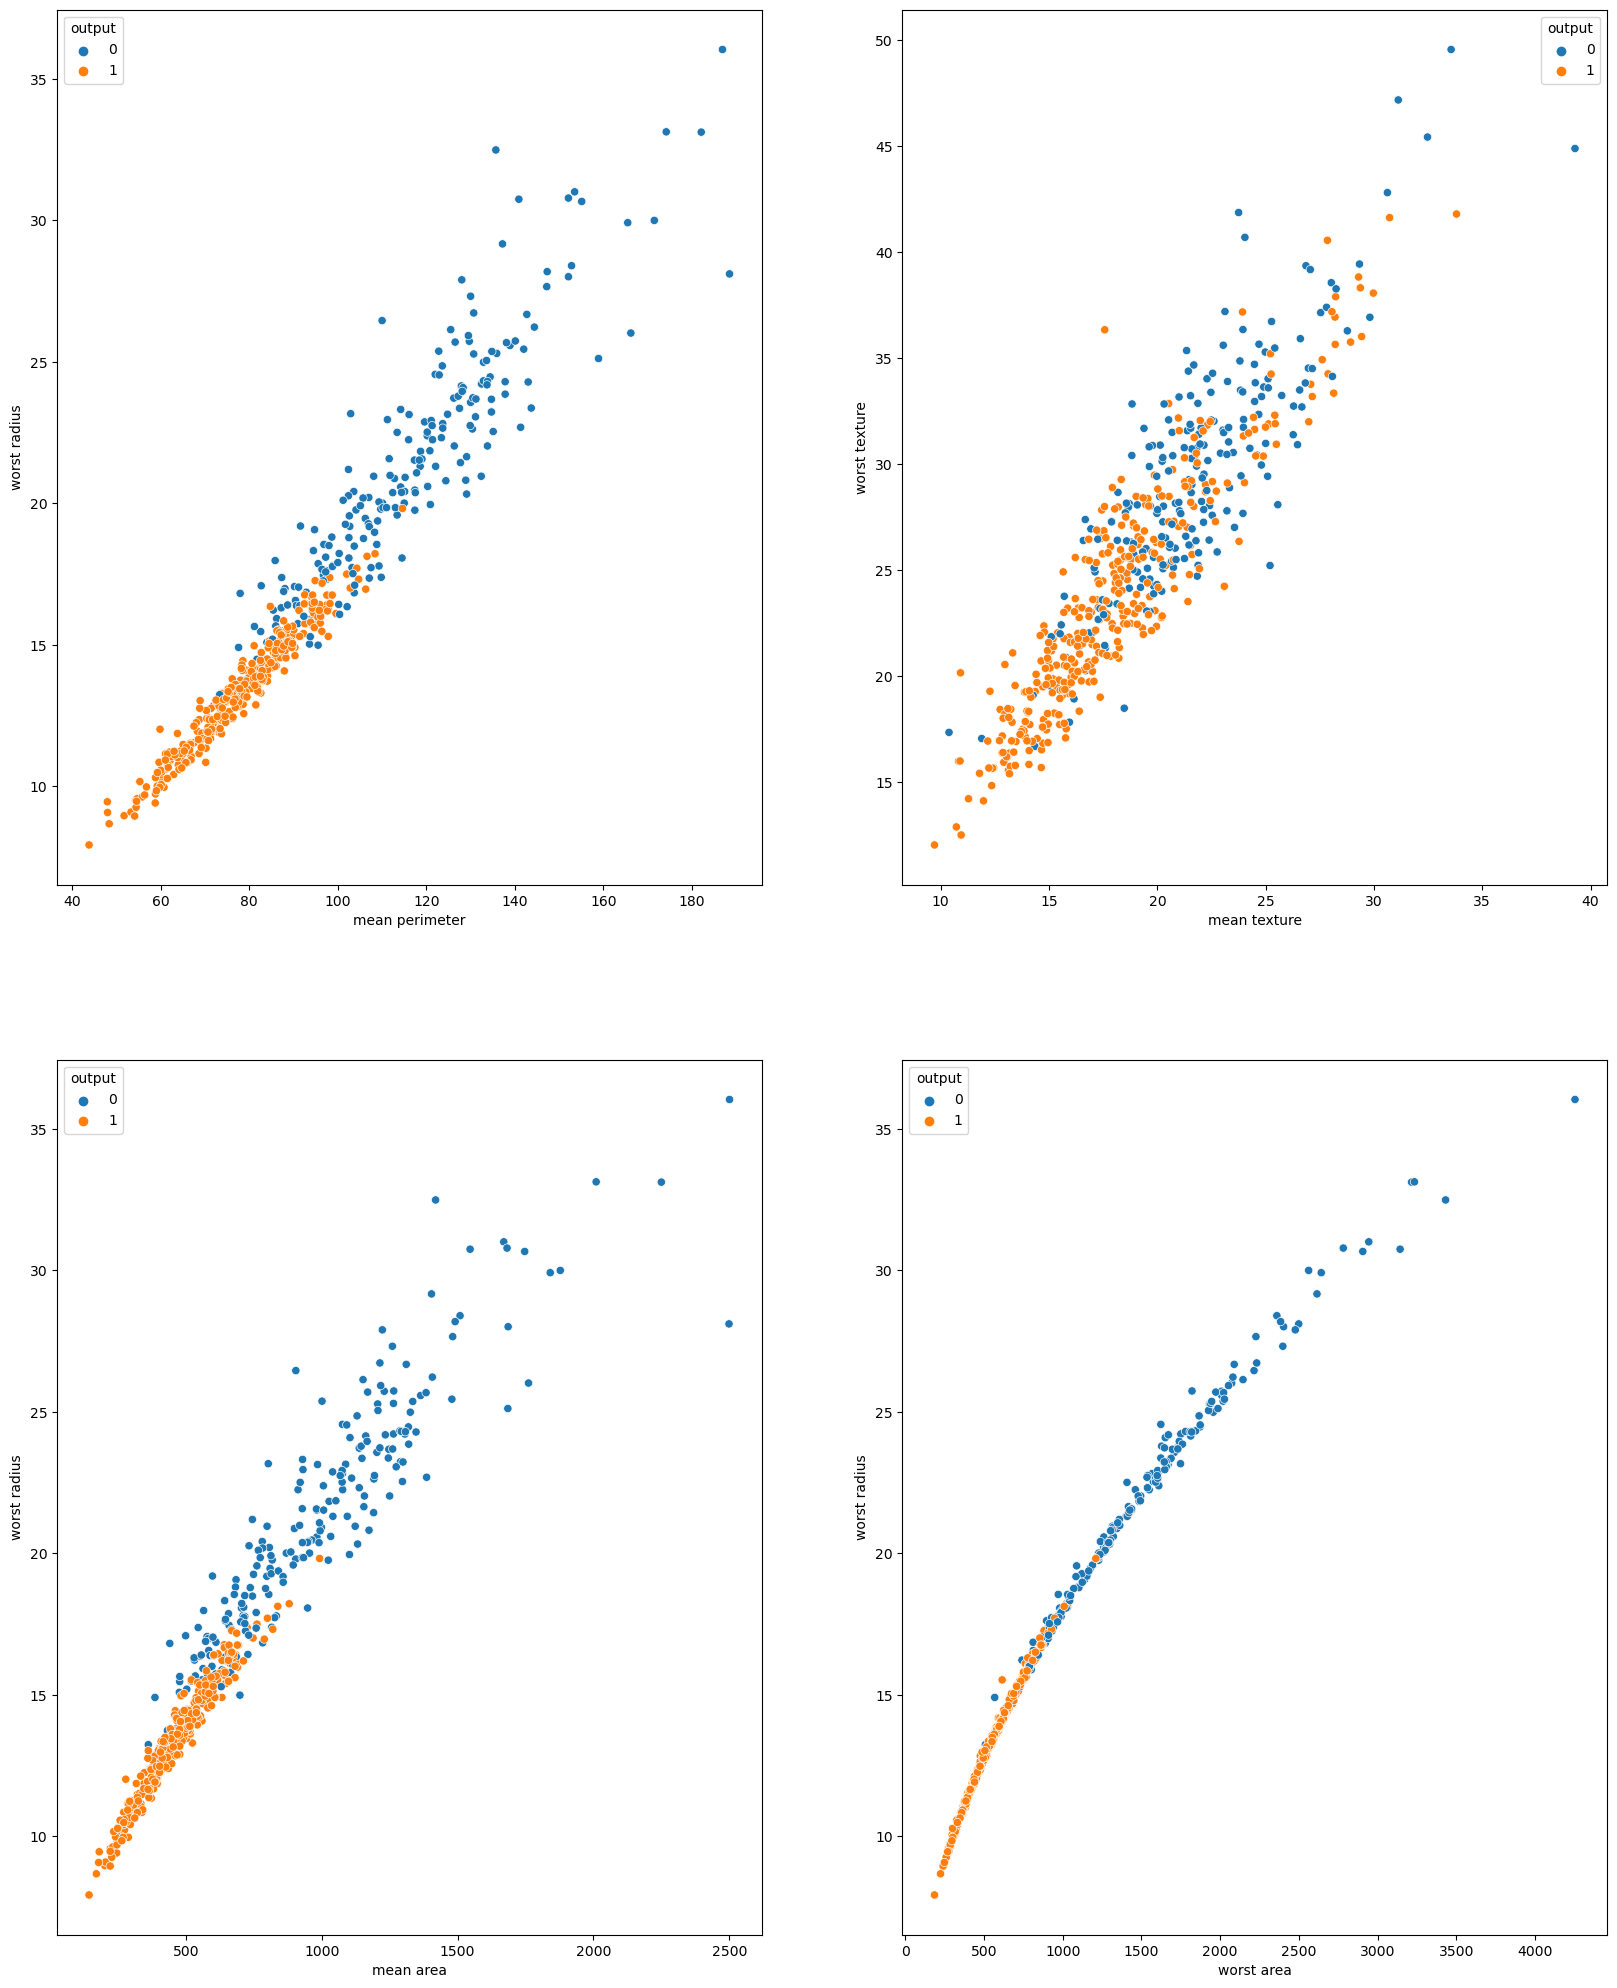

In [43]:
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='mean perimeter',y='worst radius',data=df,hue='output',ax=ax[0][0])
sns.scatterplot(x='mean area',y='worst radius',data=df,hue='output',ax=ax[1][0])
sns.scatterplot(x='mean texture',y='worst texture',data=df,hue='output',ax=ax[0][1])
sns.scatterplot(x='worst area',y='worst radius',data=df,hue='output',ax=ax[1][1])
plt.show()

<Axes: xlabel='mean area', ylabel='smoothness error'>

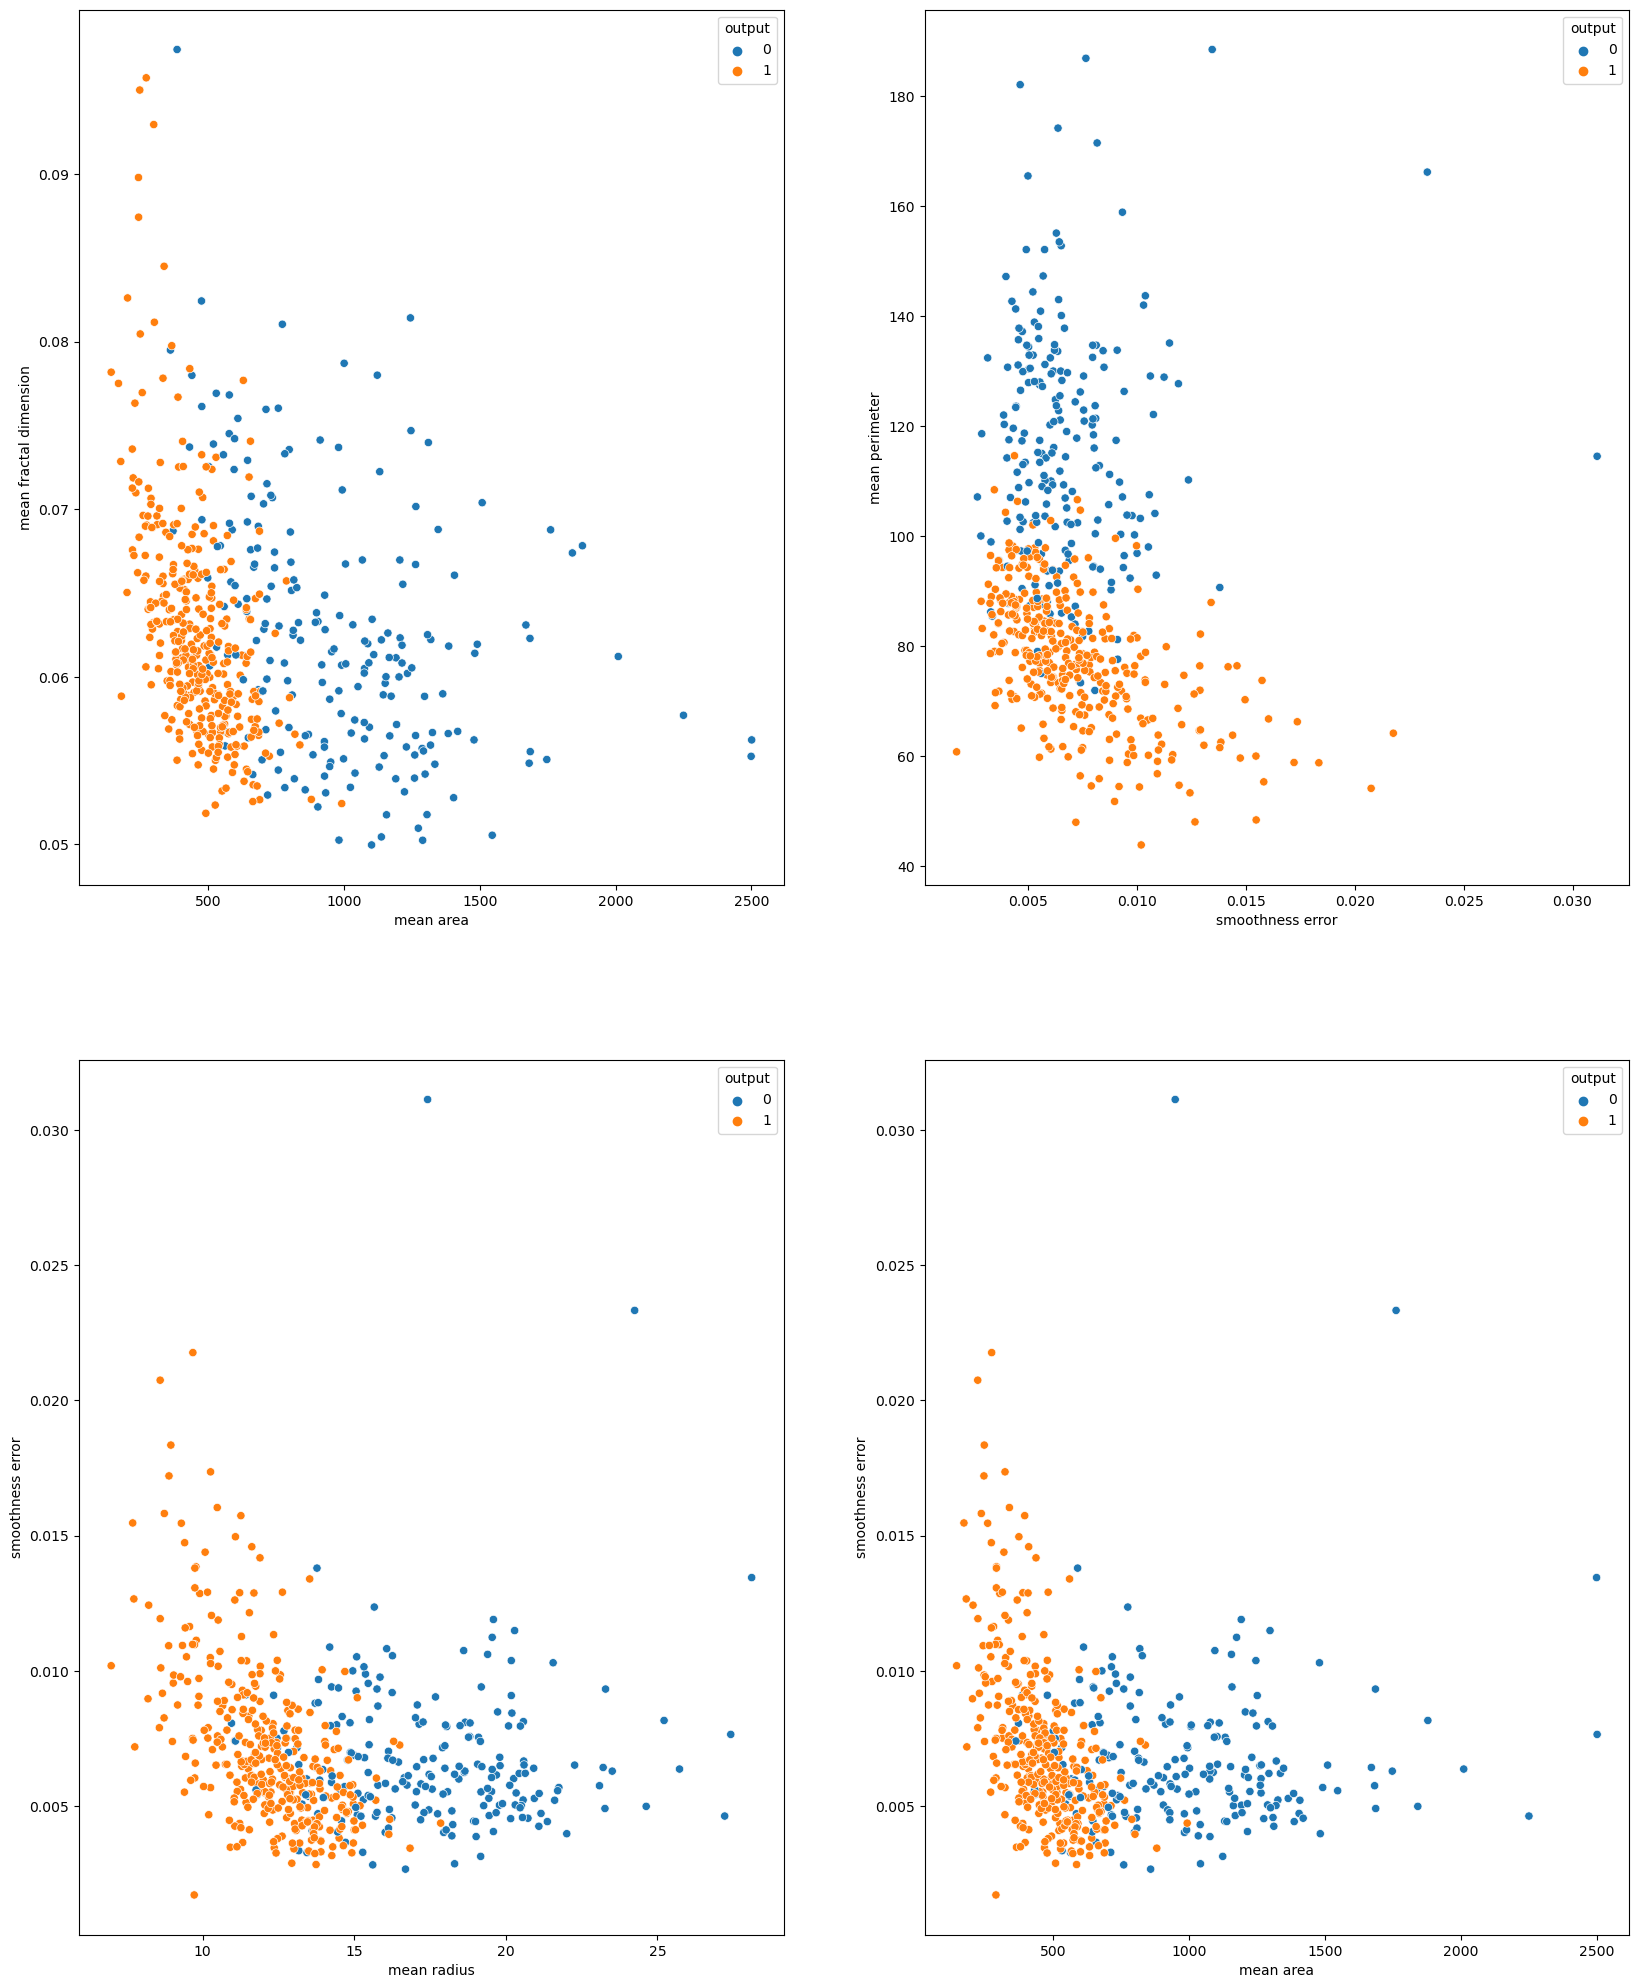

In [44]:
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='mean area',y='mean fractal dimension',data=df,hue='output',ax=ax[0][0])
sns.scatterplot(x='mean radius',y='smoothness error',data=df,hue='output',ax=ax[1][0])
sns.scatterplot(x='smoothness error',y='mean perimeter',data=df,hue='output',ax=ax[0][1])
sns.scatterplot(x='mean area',y='smoothness error',data=df,hue='output',ax=ax[1][1])

<Axes: title={'center': 'Correlation with target'}>

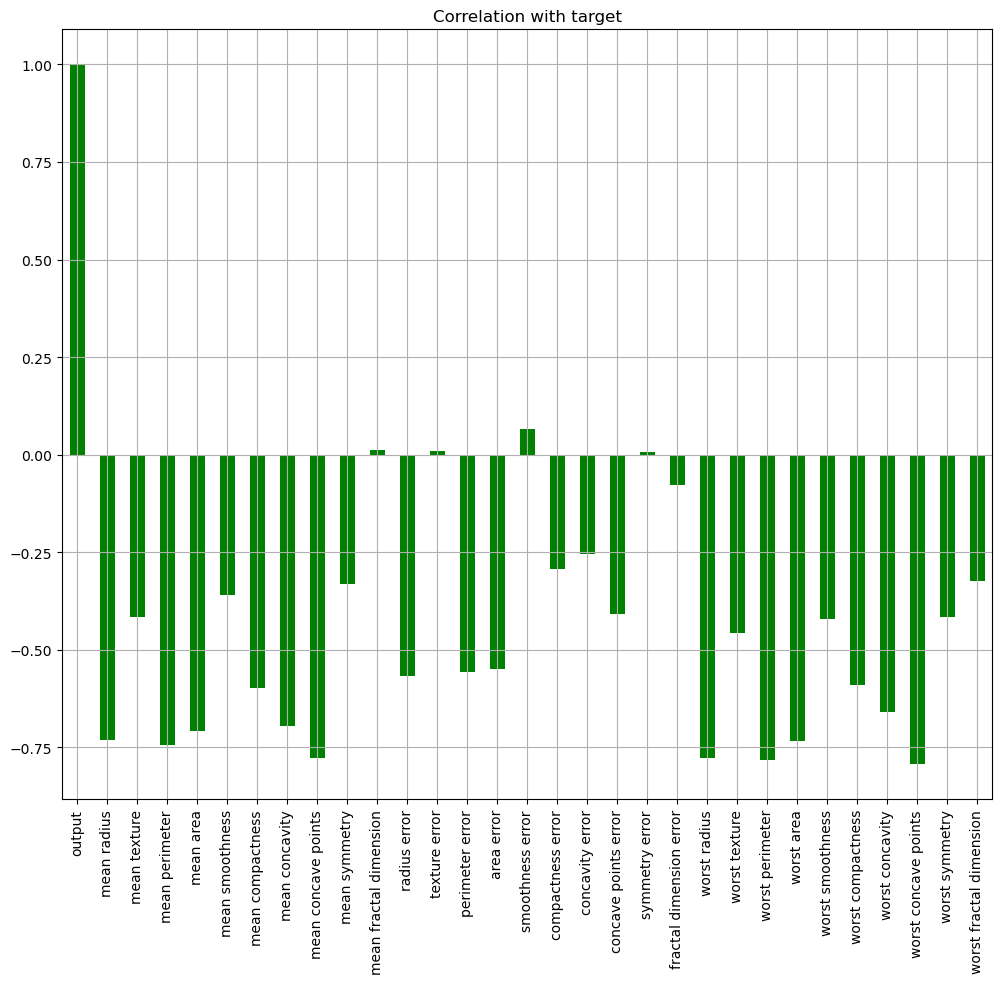

In [45]:
df.corr()['output'].plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green")

In [58]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:-1]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [60]:
ss=StandardScaler()
X_train_transformed=ss.fit_transform(X_train)
X_test_transformed=ss.transform(X_test)

In [61]:
from sklearn.decomposition import PCA
pca=PCA()

In [62]:
pca = PCA(n_components=0.95)
X_train_final = pca.fit_transform(X_train_transformed)
X_test_final=pca.transform(X_test_transformed)

In [65]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_final,y_train)

SVC()

In [67]:
predict_svc= model.predict(X_test_final)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score

In [68]:
print(confusion_matrix(y_test,predict_svc))

[[ 65   1]
 [  0 105]]


In [69]:
print(classification_report(y_test,predict_svc))
print(accuracy_score(y_test,predict_svc))
print(f1_score(y_test,predict_svc))
print(recall_score(y_test,predict_svc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.99      1.00      1.00       105

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

0.9941520467836257
0.9952606635071091
1.0


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [80]:
lr=LogisticRegression()
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
knn=KNeighborsClassifier()

In [81]:
lr.fit(X_train_final,y_train)
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
xgb.fit(X_train_final,y_train)
knn.fit(X_train_final,y_train)

KNeighborsClassifier()

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dtree.predict(X_test)))
print(accuracy_score(y_test, rfc.predict(X_test)))
print(accuracy_score(y_test, model.predict(X_test_final)))
print(accuracy_score(y_test, xgb.predict(X_test_final)))
print(accuracy_score(y_test, lr.predict(X_test_final)))
print(accuracy_score(y_test, knn.predict(X_test_final)))

1.0
1.0
0.9941520467836257
0.9824561403508771
0.9883040935672515
0.9941520467836257


In [77]:
print(confusion_matrix(y_test,dtree.predict(X_test)))

[[ 66   0]
 [  0 105]]


In [78]:
print(confusion_matrix(y_test,rfc.predict(X_test)))

[[ 66   0]
 [  0 105]]


In [83]:
print(confusion_matrix(y_test,knn.predict(X_test_final)))

[[ 65   1]
 [  0 105]]


In [84]:
rfc.feature_importances_

array([0.23651716, 0.03519034, 0.00738415, 0.0287142 , 0.03389463,
       0.00415185, 0.0071318 , 0.05042255, 0.06684801, 0.00314278,
       0.00145937, 0.00987502, 0.00406034, 0.00081872, 0.02074355,
       0.00161542, 0.0017349 , 0.00375164, 0.00172419, 0.00168451,
       0.00196525, 0.11609386, 0.01120804, 0.10590823, 0.10289296,
       0.00498692, 0.00954096, 0.01134817, 0.10758238, 0.00760812])

In [85]:
lr.coef_

array([[-2.00797127,  0.90468889,  0.62301537, -0.93831338,  0.53466473,
         0.07345688,  0.64526607,  0.8465724 , -0.55431032, -0.20563875,
        -1.78750454]])